In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

INF = 2
N = 500 # num of points

# plot configuration
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 10, 10

# МЕТОД ЗНАХОДЖЕННЯ УСІХ НАЙБЛИЖЧИХ СУСІДІВ

Маємо задачу:
_На площині задано N точок. Знайти найближчого сусіда для кожної точки множини._

Застосуємо запропонований алгоритм розв'язання цієї задачі ([звіт](https://drive.google.com/file/d/1XyCvTdd3_SKo2PINlqk9VzF_EWYgREU9/view?usp=sharing), ч. 2).

## Побудова тріангуляції Делоне

Оскільки необхідно знайти всього одного найближчого сусіда для кожної з точок множини, можна застосувати добре відому тріангуляцію Делоне. Не має сумнівів, ребра отриманого розбиття будуть включати в себе шуканий геометричний розв’язок нашої задачі.

Тож на площині є _N_ точок, що задані координатами у диапозоні від 0 до 1.

In [127]:
# points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
points = np.random.rand(N, 2)

Будуємо тріангуляцію Делоне:

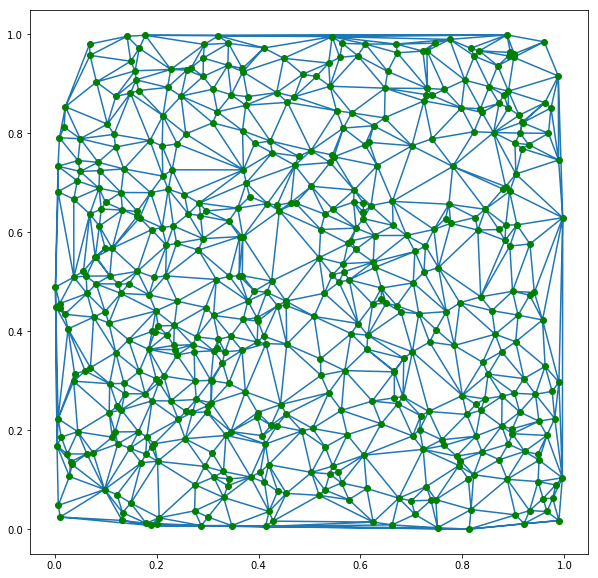

In [128]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'go')
plt.show()

## Відокремлення шуканого розв'язку

Для кожної вершіни отриманого графа розглянемо її сусідів "по тріангуляції", за пошук яких відповідає функція

In [129]:
def find_neighbors(p_ind, triang):
    neighbors = []
    for simplex in triang.vertices:
        if p_ind in simplex:
            neighbors += [simplex[i] for i in range(len(simplex)) if simplex[i] != p_ind]
            '''
            If a simplex contains the point we're interested in, extend the neighbors list
            by appending all the other point's indices in the simplex.
            '''
    # now we just have to strip out all the duplicate indices and return the neighbors list:
    return list(set(neighbors))

Залишається тільки 5-6 етап алгоритму, а саме вибір найближчого сусіда для кожної з точок нашої множини:

In [130]:
res = []
for ind in range(N):
    mindist = INF
    min_ind = None
    for n_ind in find_neighbors(ind, tri):
        dist = np.linalg.norm(points[ind] - points[n_ind]) # distance between current pair of neighbor points
        if dist < mindist:
            mindist = dist
            nn_ind = n_ind
    res += [[ind, nn_ind]]
# print(res)

Малюємо шуканий геометричний розв'язок:

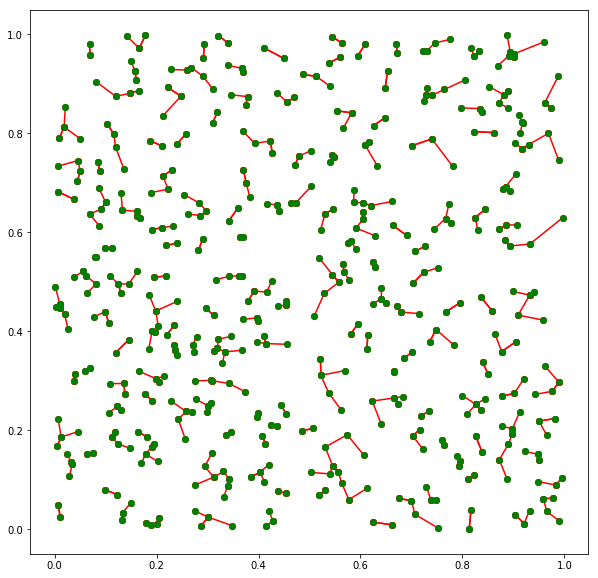

In [131]:
for pair in res:
    x1, x2 = points[pair[0]][0], points[pair[1]][0]
    y1, y2 = points[pair[0]][1], points[pair[1]][1]
    plt.plot([x1, x2], [y1, y2], 'ro-')

plt.plot(points[:,0], points[:,1], 'go')
plt.show()